电商18 180412126 王佳琦

## 1. 导入数据

本次作业主要参考https://blog.csdn.net/weixin_30965253/article/details/112201999

In [26]:
import jieba

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [27]:
text = open("data/hugo.txt",encoding='utf8').read()

text = text.replace('n',"").replace("u3000","")

## 2. 开始分词

In [28]:
# 分词，返回结果为词的列表

text_cut = jieba.lcut(text)

# 将分好的词用某个符号分割开连成字符串

text_cut = ' '.join(text_cut)
text_cut

"《 九三年 》 全集 \n 作者 ： 维克多 · 雨果 \n 声明 : 本书 由 奇书 网 ( www . xsqishu . com ) 自 网络 收集整理 制作 , 仅供 交流学习 使用 , 版权 归 原作者 和 出版社 所有 , 如果 喜欢 , 请 支持 正版 . \n \n 序 \n \n \u3000 \u3000 至于 戈万 ， 他 的 行动 倒 是 描写 得 有根有据 伪 。 雨果 早有 交代 ， 说 他 在 打仗 时 很 坚强 ， 可是 过后 很 软弱 ； 他 待人 慈悲为怀 ， 宽恕 敌人 ， 保护 修女 ， 营救 贵族 的 妻女 ， 释放 俘虏 ， 给 教士 自由 。 他 的 宽大 不是 无原则 的 ， 他 曾 对 西 穆尔 丹说 ， 他 赦免 了 战败 后 被 俘获 的 三百个 农民 ， 因为 这些 农民 是 无知 的 ， 但 他 不会 赦免 朗 特纳 克 ， 因为 朗 特纳 克 罪大恶极 ， 即使 是 他 的 叔祖 也罢 。 法兰西 才 是 他 的 兄长 ， 而朗 特纳 克是 祖国 的 叛徒 。 他 和 朗 特纳 克 誓不两立 ， 只能 你死我活 。 然而 ， 他 又 有 一些 想法 ， 与 他 的 司令官 身份 很 不相称 。 例如 ， 他 认为 路易十六 是 一只 被 投到 狮子 堆里 的 羊 ， 他 想 逃命 和 防卫 是 很 自然 的 ， 虽然 他 一有 可能 便会 咬 人 。 最 主要 的 是 ， 他 认为 “ 恐怖 政治 会 报害 革命 的 名誉 ” ， 推翻 帝制 不是 要 用 断头台 来 代替 它 ， “ 打 掉 王冠 ， 但是 要 保护 人头 。 革命 是 和谐 ， 不是 恐怖 … … ‘ 恕 ’ 字 在我看来 是 人类 语言 中 最美 的 一个 字 … … 在 打仗 的 时候 ， 我们 必须 做 我们 的 敌人 的 敌人 ， 胜利 以后 ， 我们 就要 做 他们 的 兄弟 。 ” 这些 话 为 他 后来 的 行动 按下 了 伏笔 ， 虽然 是 雨果 的 观点 ， 但 与 人物 的 思想 是 融合 在 一起 的 。 \n \u3000 \u3000 戈万 的 行动 同 雨果 对 雅各宾派 的 看法 有关 ， 雨果 对 雅各 宾党 的 恐怖 政治 是 颇 有 微词 的 。 在 他 的 笔下 ， 雅各 宾党 三 巨头 狂热 多

就这个文本来说，我觉得分得一点也不科学。

## 3. 词频统计

In [57]:
from collections import Counter
def get_words(txt):
    seg_list = jieba.cut(txt)   #对文本进行分词
    c = Counter()
    for x in seg_list:          #进行词频统计
        if len(x)>1 and x != '\r\n':
            c[x] += 1
    print('常用词频度统计结果')
    for (k,v) in c.most_common(20):      #遍历输出高频词
        print('%s%s %s  %d' % ('  '*(5-len(k)), k, '*'*int(v/2), v))

In [58]:
get_words(text)

常用词频度统计结果
      他们 ************************************************************************************************************************************************************************************************************************************************************************************  552
      一个 *****************************************************************************************************************************************************************************************************************  418
      我们 *************************************************************************************************************************************************************************  338
      没有 *******************************************************************************************************************************************************************  326
      这个 ********************************************************************************************************

## 4. 词云图

In [20]:
#from nltk.corpus import stopwords  #里面没有中文的

In [32]:
stop_words = open("data/stopwords-master/hit_stopwords.txt",encoding="utf8").read().split("\n") #自己下载的中文停词表，以换行作为分割
stop_words

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃ ',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '. ',
 '『',
 '.一',
 './',
 '-- ',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也 ',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］ ',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１． ',
 '－－ ',
 '［②ｂ］',
 '’‘ ',
 '××× ',
 '［①⑧］',
 '０：２ ',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］ ',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［ ',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［ ',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '

(-0.5, 399.5, 199.5, -0.5)

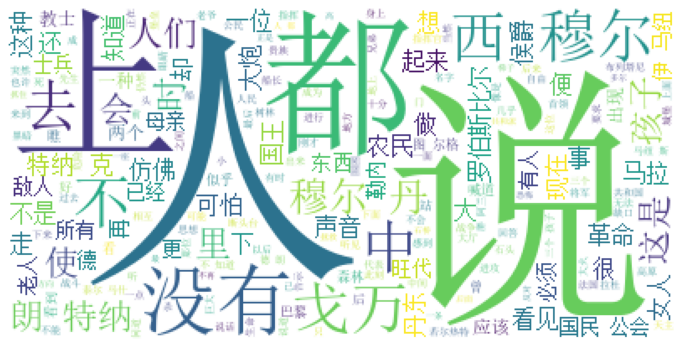

In [33]:
word_cloud = WordCloud(font_path="simsun.ttc", # 设置词云字体

background_color="white", # 词云图的背景颜色

stopwords=stop_words) # 去掉的停词

word_cloud.generate(text_cut)

# 运用matplotlib展现结果

plt.subplots(figsize=(12,8))

plt.imshow(word_cloud)

plt.axis("off")

很多角色名字分得并不好，如果将角色名字去掉，继续作词云图呢？

In [35]:
stop_words = open("data/stopwords-master/jiaqi.txt",encoding="utf8").read().split("\n") #自己下载的中文停词表，以换行作为分割
stop_words

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃ ',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '. ',
 '『',
 '.一',
 './',
 '-- ',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也 ',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］ ',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１． ',
 '－－ ',
 '［②ｂ］',
 '’‘ ',
 '××× ',
 '［①⑧］',
 '０：２ ',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］ ',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［ ',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［ ',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '

(-0.5, 399.5, 199.5, -0.5)

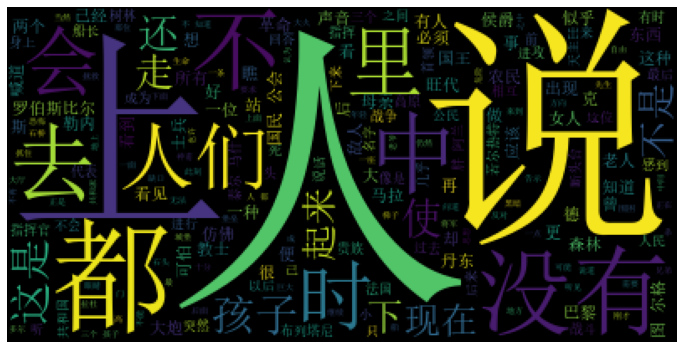

In [36]:
word_cloud = WordCloud(font_path="simsun.ttc", # 设置词云字体

background_color="black", # 词云图的背景颜色

stopwords=stop_words) # 去掉的停词

word_cloud.generate(text_cut)

# 运用matplotlib展现结果

plt.subplots(figsize=(12,8))

plt.imshow(word_cloud)

plt.axis("off")

不愧是人道主义典范小说，最多的肯定是人。

(-0.5, 399.5, 199.5, -0.5)

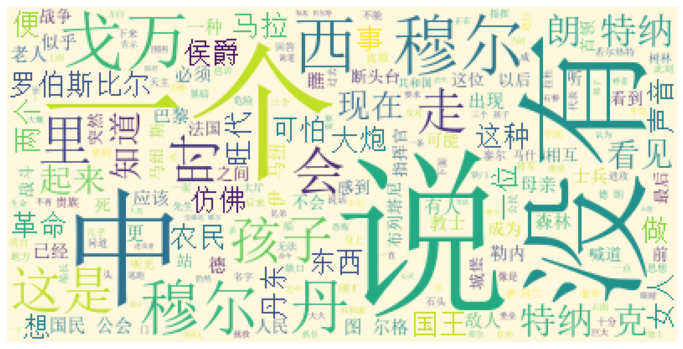

In [37]:
stop_words = open("data/stopwords-master/cn_stopwords.txt",encoding="utf8").read().split("\n") #换一个停词表
word_cloud = WordCloud(font_path="simsun.ttc", # 设置词云字体

background_color="#fff8dc", # 词云图的背景颜色

stopwords=stop_words) # 去掉的停词

word_cloud.generate(text_cut)

# 运用matplotlib展现结果

plt.subplots(figsize=(12,8))

plt.imshow(word_cloud)

plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

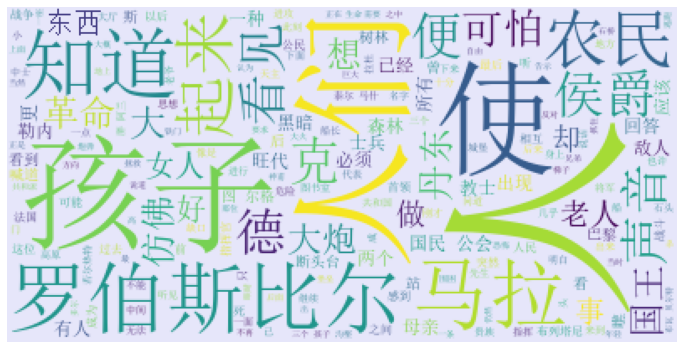

In [39]:
stop_words = open("data/stopwords-master/jiaqi.txt",encoding="utf8").read().split("\n") #用我添加的停词表
word_cloud = WordCloud(font_path="simsun.ttc", # 设置词云字体

background_color="#e6e6fa", # 词云图的背景颜色

stopwords=stop_words) # 去掉的停词

word_cloud.generate(text_cut)

# 运用matplotlib展现结果

plt.subplots(figsize=(12,8))

plt.imshow(word_cloud)

plt.axis("off")